# CNN Fashion MNIST

In [0]:
!pip install -q tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 450kB 33.8MB/s 
     |████████████████████████████████| 3.8MB 39.5MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.


In [0]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(tf.__version__, tf.test.gpu_device_name())
device_lib.list_local_devices()

2.0.0 /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11811687717848773165, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 198956011386321546
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3826814669553785656
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4967592656970770761
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Load the data

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Play with the data

In [0]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (60000, 28, 28) (60000,)
Test data:  (10000, 28, 28) (10000,)


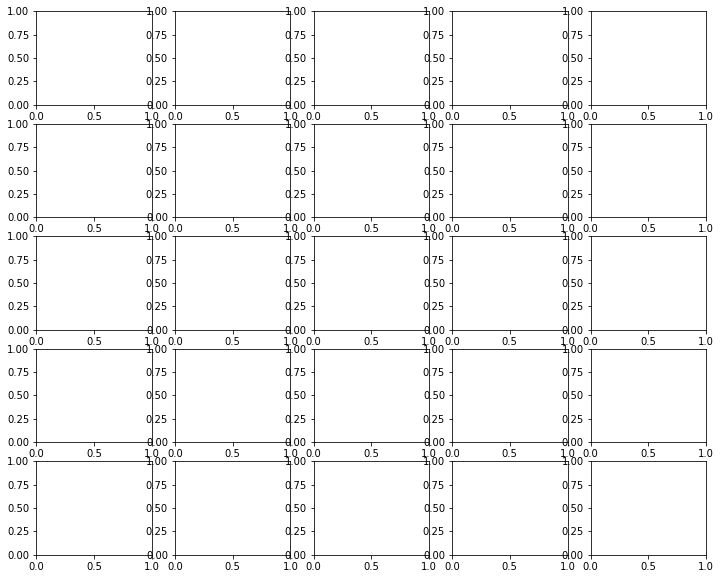

In [0]:
fig1, ax1 = plt.subplots(nrows=5, ncols=5, figsize=(12, 10));

In [0]:
for i in range(5):
		for j in range(5):
			ax1[i, j].axis('off')
			ax1[i, j].grid(False)
			ax1[i, j].set_xticks([])
			ax1[i, j].set_yticks([])

In [0]:
index = 0;
for i in range(5):
    for j in range(5):

        ax1[i, j].imshow(x_train[index])
        ax1[i, j].set_title(r''.format(y_train[index]), fontsize=8)
        index += 1

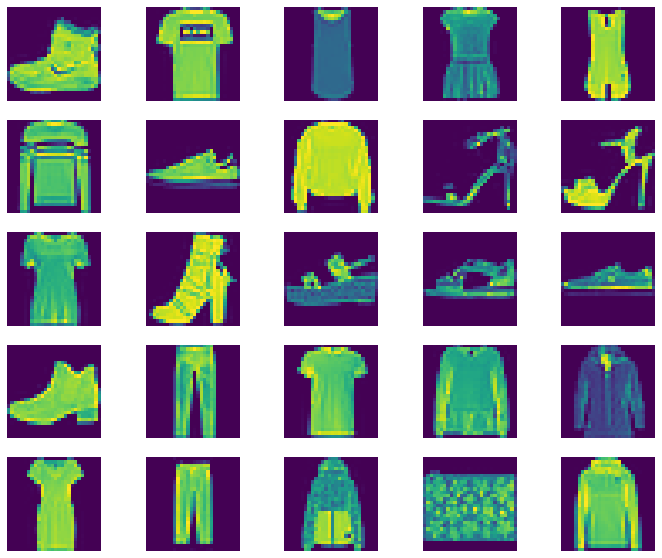

In [0]:
fig1

## Prepate the data

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [0]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (60000, 28, 28, 1) (60000,)
Test data:  (10000, 28, 28, 1) (10000,)


## Build the model

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same', input_shape=x_train[0].shape) )
#model.add(tf.keras.layers.MaxPool2D( ))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same') )
#model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same') )
#model.add(tf.keras.layers.MaxPool2D( ))

model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add( tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)              

## Train the model

In [40]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 15s 257us/sample - loss: 0.4293 - accuracy: 0.8436 - val_loss: 0.3230 - val_accuracy: 0.8824
Epoch 2/15
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2899 - accuracy: 0.8930 - val_loss: 0.2812 - val_accuracy: 0.8935
Epoch 3/15
60000/60000 [==============================] - 14s 241us/sample - loss: 0.2458 - accuracy: 0.9091 - val_loss: 0.2709 - val_accuracy: 0.9011
Epoch 4/15
60000/60000 [==============================] - 14s 241us/sample - loss: 0.2135 - accuracy: 0.9193 - val_loss: 0.2533 - val_accuracy: 0.9063
Epoch 5/15
60000/60000 [==============================] - 14s 241us/sample - loss: 0.1875 - accuracy: 0.9297 - val_loss: 0.2582 - val_accuracy: 0.9090
Epoch 6/15
60000/60000 [==============================] - 15s 252us/sample - loss: 0.1670 - accuracy: 0.9383 - val_loss: 0.2512 - val_accuracy: 0.9157
Epoch 7/15
60000/60000 [====================

## Evaluate the model

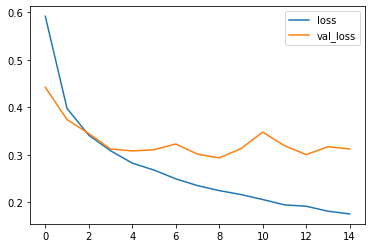

In [0]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

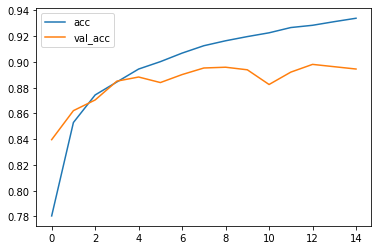

In [0]:
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

## Make predictions

In [0]:
y_test_hat = model.predict(x_test).argmax(axis=1)

In [0]:
cm = confusion_matrix(y_test, y_test_hat)

In [0]:
cm

In [0]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(cm,annot=True,cbar=False)

In [0]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('\n'.join(['{}: {}'.format(i, classes[i]) for i in range(len(classes))]) )

In [0]:
model.save('mnist-fnn.h5')

In [0]:
model2 = tf.keras.models.load_model('mnist-fnn.h5')